# 공간분석과 공간통계: 공간패턴분석 (Hotspot vs. ColdSpot)
### 가천대학교 공간정보시스템(14842001) 장요한 (ycanns@gachon.ac.kr)
------------------


#### 구글드라이브 접속(필요시)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Initialization

In [12]:
import sys
!{sys.executable} -m pip install geopandas
# ! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [19]:
import pandas as pd
import geopandas as gpd
from cartoframes.viz import Layer, color_category_style
from shapely.geometry import Polygon, Point, LineString
from shapely.ops import transform
from functools import partial
import pyproj, esda
import numpy as np, matplotlib.pyplot as plt
plt.style.use('ggplot')
import folium
from folium.plugins import FloatImage

import os

#### 2. Import DATA

In [ ]:
# 필요한 파일 업로드 기능 (구글 코랩)
from google.colab import files
uploaded = files.upload()
data_folder = os. getcwd()

In [ ]:
# 구글 드리이브에 파일이 있는 경우
data_folder = "/content/drive/MyDrive/sample_files/"

In [5]:
# 시군구(SGG) 와 읍면동(UMD) GIS 파일 읽어오기
Seoul_SGG = gpd.read_file(data_folder  + "LARD_ADM_SECT_SGG_서울/LARD_ADM_SECT_SGG_11.shp", encoding='cp949')
#Seoul_UMD = gpd.read_file(data_folder  + "LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11.shp", encoding='cp949')

#Kyggi_SGG = gpd.read_file(data_folder  + "LARD_ADM_SECT_SGG_경기/LARD_ADM_SECT_SGG_41.shp", encoding='cp949')
#Kyggi_UMD = gpd.read_file(data_folder  + "LSMD_ADM_SECT_UMD_경기/LSMD_ADM_SECT_UMD_41.shp", encoding='cp949')

In [7]:
Seoul_SGG

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,NaN,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,NaN,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,NaN,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,NaN,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,NaN,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,동작구,NaN,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,영등포구,NaN,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,금천구,NaN,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,구로구,NaN,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,강서구,NaN,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


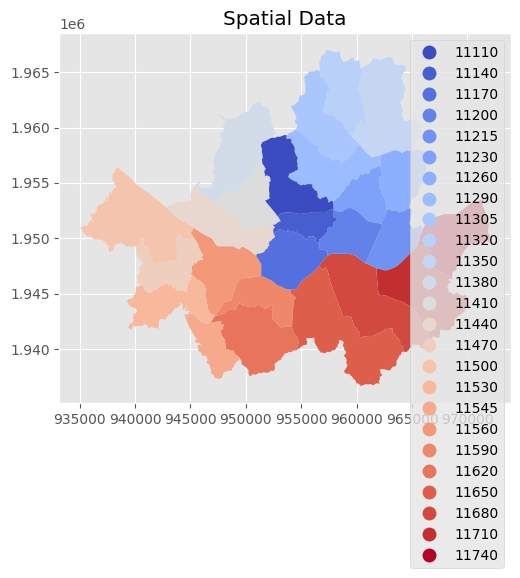

In [8]:
data = Seoul_SGG
# Plot the spatial data
data.plot(column='COL_ADM_SE', cmap='coolwarm', legend=True)
plt.title('Spatial Data')
plt.show()

END CODE